In [1]:
#Load libaries
import os
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
from pydotplus import graph_from_dot_data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC 
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score, KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

#Load datasets
#ex_data =  pd.read_csv('sayad_dataset.csv')
data = pd.read_csv('CA_Wildfires.csv')                      # First build dataset on all CA
#data = pd.read_csv('CA_Wildfires_by_county.csv')           # Data on 44 counties
#data = pd.read_csv('CA_Wildfires_fire_seasonV2.csv')
#data = pd.read_csv('CA_Wildfires_4_Counties_June-Oct.csv')
#data = pd.read_csv('CA_Wildfires2020.txt')

In [2]:
data.head()

,NDVI,LST,TA,Class
0,0.241233,280.170902,5.0,No_fire
1,0.242536,281.678667,5.0,No_fire
2,0.243840,285.865983,5.0,No_fire
3,0.245143,283.249994,5.0,No_fire
4,0.246446,275.546052,4.0,No_fire


In [3]:
data["Class"].replace({"Fire": 1, "No_fire": 0}, inplace=True)
data = data[['NDVI','LST','TA','Class']]

In [4]:
data

,NDVI,LST,TA,Class
0,0.241233,280.170902,5.0,0
1,0.242536,281.678667,5.0,0
2,0.243840,285.865983,5.0,0
3,0.245143,283.249994,5.0,0
4,0.246446,275.546052,4.0,0
...,...,...,...,...
726,0.323556,285.095924,5.0,0
727,0.322612,279.868729,8.0,0
728,0.321667,281.404568,5.0,0
729,0.320723,284.108339,5.0,0


In [5]:
data.TA.value_counts()

5.0    474
9.0    189
8.0     50
4.0     18
Name: TA, dtype: int64

In [6]:
data = data[data.TA !=4]

In [7]:
data.TA.value_counts()


5.0    474
9.0    189
8.0     50
Name: TA, dtype: int64

In [8]:
Count=data.Class.value_counts() #count target feature 
Count

0    421
1    292
Name: Class, dtype: int64

In [9]:
print('Proportion:', round(Count[0] / Count[1], 2), ': 1')


Proportion: 1.44 : 1


In [10]:
data.head()

,NDVI,LST,TA,Class
0,0.241233,280.170902,5.0,0
1,0.242536,281.678667,5.0,0
2,0.243840,285.865983,5.0,0
3,0.245143,283.249994,5.0,0
6,0.249052,286.090648,5.0,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 0 to 730
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NDVI    713 non-null    float64
 1   LST     713 non-null    float64
 2   TA      713 non-null    float64
 3   Class   713 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 27.9 KB


In [12]:
data.describe() # Statistic summary

,NDVI,LST,TA,Class
count,713.000000,713.000000,713.000000,713.000000
mean,0.347496,299.580469,6.270687,0.409537
std,0.069853,10.773156,1.806184,0.492094
min,0.211590,275.767384,5.000000,0.000000
25%,0.288568,289.960760,5.000000,0.000000
50%,0.339890,301.138505,5.000000,0.000000
75%,0.399713,308.732448,9.000000,1.000000
max,0.588486,318.525754,9.000000,1.000000


In [13]:
data.isnull().sum() # return number of missing value for each column

NDVI     0
LST      0
TA       0
Class    0
dtype: int64

In [14]:
#data = data.fillna(data.mean()) #Fill 13 missing values in NDVI with average NDVI
#data = data.dropna() #drop all rows contain NaN

In [15]:
data.drop(columns='Class').skew(axis = 0) # return skewness of each independent feature

NDVI    0.458225
LST    -0.225918
TA      0.747841
dtype: float64

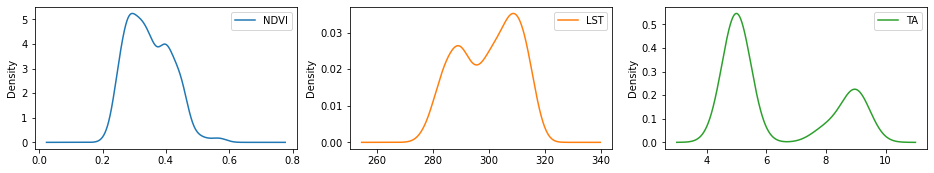

In [16]:
# Density
data.drop(columns='Class').plot(kind='density', subplots=True, layout=(4,3),figsize=(16, 12), sharex=False)
plt.show()

In [17]:

data.corr() #return correlation between columns

,NDVI,LST,TA,Class
NDVI,1.000000,-0.211127,0.155989,0.028560
LST,-0.211127,1.000000,0.372892,0.559003
TA,0.155989,0.372892,1.000000,0.472414
Class,0.028560,0.559003,0.472414,1.000000


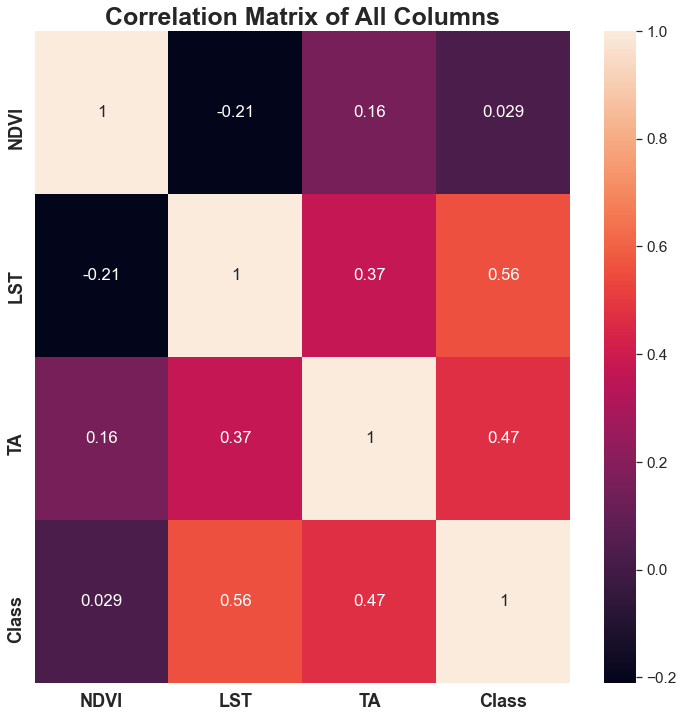

In [18]:
#Correlation matrix
plt.figure(figsize=(12, 12))
corr = data.corr()
sns.set(font_scale=1.4)
res=sns.heatmap(corr, annot=True)
res.set_title("Correlation Matrix of All Columns",fontsize=25,fontweight='bold')
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18,fontweight='bold')
res.set_yticklabels(res.get_xmajorticklabels(), fontsize = 18,fontweight='bold')
plt.savefig('C:/Users/kayle/Desktop/CorrMatrix',dpi=300) #, transparent=True)
plt.show()

In [19]:
data.Class.value_counts() #count target feature 

0    421
1    292
Name: Class, dtype: int64

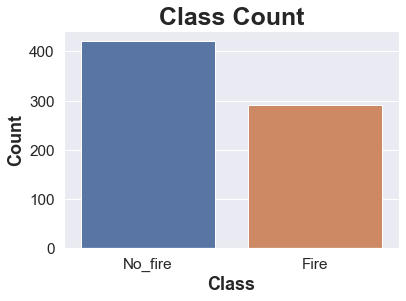

In [20]:
data["Class"].replace({1:"Fire", 0:"No_fire"}, inplace=True)
#count plot of target feature
classCount= sns.countplot(x='Class', data = data)
classCount.axes.set_title("Class Count",fontsize=25,fontweight='bold')
classCount.set_xlabel("Class",fontsize=18,fontweight='bold')
classCount.set_ylabel("Count",fontsize=18,fontweight='bold')
plt.savefig('C:/Users/kayle/Desktop/ClassCount',dpi=300,bbox_inches='tight')
plt.show()

In [21]:
data["Class"].replace({"Fire": 1, "No_fire": 0}, inplace=True)

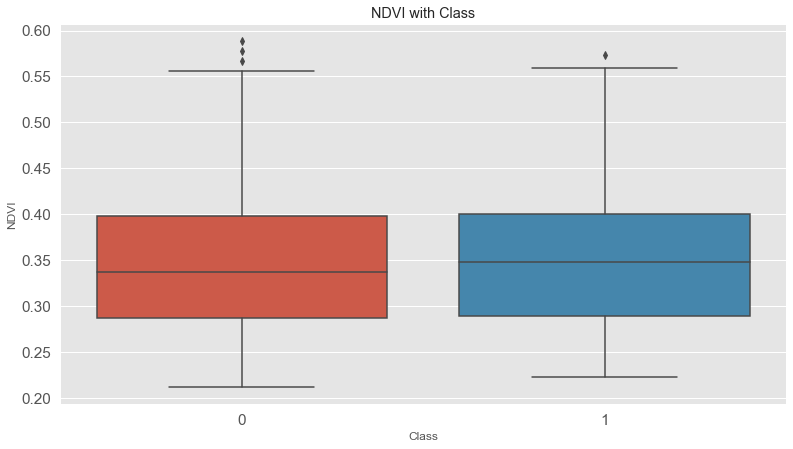

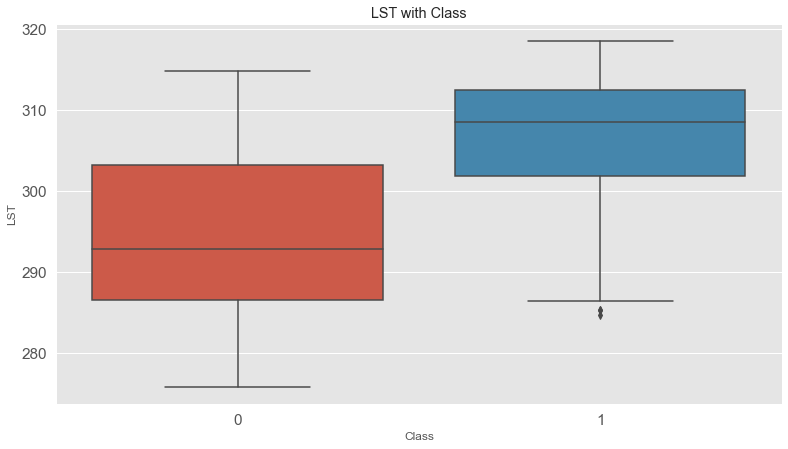

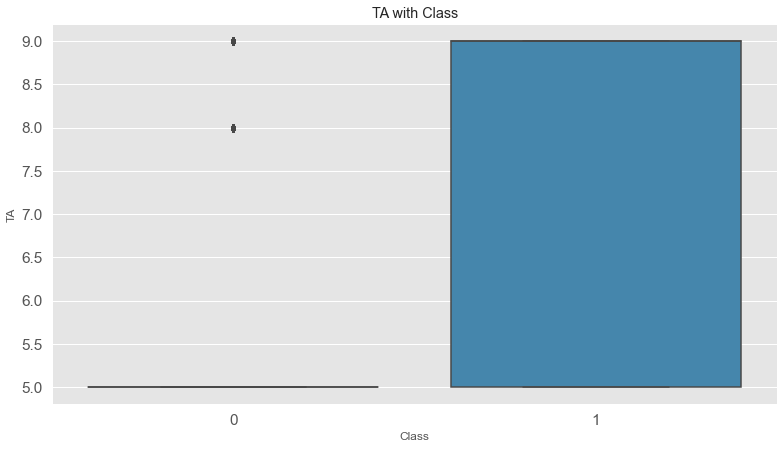

In [22]:
# Visualiztion of outliers data
column_names = ['NDVI', 'LST', 'TA']
#Boxplot
train = data[column_names]
plt.style.use('ggplot')
for i in column_names:
    plt.figure(figsize=(13, 7))
    plt.title(str(i) + " with " + str('Class'))
    sns.boxplot(x=data.Class, y=train[i])
    plt.show()

In [23]:
# finding outliers using zscore
#z = np.abs(stats.zscore(data))
#z  # print outliers

In [24]:
#data.shape

In [25]:
#np.count_nonzero(np.where( z > 3)) # count number of outliers

In [26]:
#data_outlier_z = data[(z <= 3).all(axis=1)] #dropped outliers
#data_outlier_z.shape     #shape after removed outliers

In [27]:
# Histograms
#data_outlier_z.drop(columns=['Class']).hist(bins=20, figsize=(15,15),color='b'); 

In [28]:
#scaler = StandardScaler() # Normalize data using z-score normalizer
#data_normalize = scaler.fit_transform(data) #.drop(columns=['Class']))
#data_normalize_df = pd.DataFrame(data_normalize,columns=['NDVI','LST','TA','Class'])

In [29]:
#data_normalize_df.hist(bins=20, figsize=(15,15),color='b'); # After normalied data

# Applying models and evalution

# Logistic Regression

In [30]:
X= data.drop(columns=['Class']).values
Y = data['Class'].values
scale= StandardScaler()
X = scale.fit_transform(X) 
# 20% test 80% training data             
X_train, X_test, y_train, y_test, = train_test_split(X, Y, test_size=0.2,random_state = 42)

                                                         # 0.25 x 0.8 = 0.2 for validation data
X_train, X_val, y_train, y_val, = train_test_split(X_train, y_train, test_size=0.25,random_state = 16) 

# Instantiate
LR = LogisticRegression(C=0.01, penalty= 'l2', solver= 'liblinear')
# Fit
LR = LR.fit(X_train, y_train)
LR.score(X_train,y_train)

# Predictions on the test dataset
LR_pred = pd.DataFrame(LR.predict(X_test))

# Probabilities on the test dataset
probs = pd.DataFrame(LR.predict_proba(X_test))

print(metrics.classification_report(y_test, LR_pred))   #Logistic Regression 


              precision    recall  f1-score   support

           0       0.87      0.92      0.90        88
           1       0.86      0.78      0.82        55

    accuracy                           0.87       143
   macro avg       0.87      0.85      0.86       143
weighted avg       0.87      0.87      0.87       143



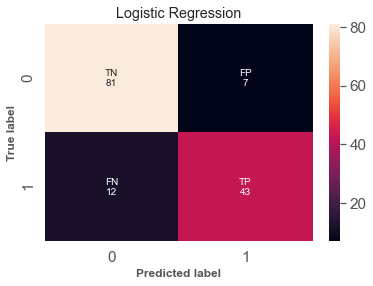

In [31]:
LR_cm = confusion_matrix(y_test, LR_pred)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                LR_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(LR_cm,annot=labels,fmt='')
plt.title('Logistic Regression')
plt.ylabel('True label',fontweight='bold')
plt.xlabel('Predicted label',fontweight='bold')
plt.savefig('C:/Users/kayle/Desktop/LR_confmatrix',dpi=300,bbox_inches='tight', transparent=True)

In [32]:
# get prediction for X_val
new_output = LR.predict(X_val)
np.unique(new_output,return_counts=True)

(array([0, 1], dtype=int64), array([79, 64], dtype=int64))

In [33]:
np.unique(y_val,return_counts=True)

(array([0, 1], dtype=int64), array([75, 68], dtype=int64))

In [34]:
#Hyperparameter Tuning for Logistic Regression
# define models and parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
LR = LogisticRegression()
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=LR, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.808301 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.798011 (0.043967) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.798011 (0.043967) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.798011 (0.043967) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.798481 (0.042874) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.798481 (0.042874) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.798481 (0.042874) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.799870 (0.041163) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.799870 (0.041163) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.798011 (0.041517) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.801291 (0.039975) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.801291 (0.039975) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.798944 (0.039562) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.799387 (0.037529) wi

# Gaussian Naive Bayes

In [35]:
X= data.drop(columns=['Class']).values
Y = data['Class'].values
scale= StandardScaler()
X = scale.fit_transform(X) 

# 20% test 80% training data             
X_train, X_test, y_train, y_test, = train_test_split(X, Y, test_size=0.2,random_state = 42)

                                                         # 0.25 x 0.8 = 0.2 for validation data
X_train, X_val, y_train, y_val, = train_test_split(X_train, y_train, test_size=0.25,random_state = 42) 

#NB = MultinomialNB()
NB= GaussianNB(var_smoothing= 0.12328467394420659)
NB.fit(X_train, y_train)

NB_pred = pd.DataFrame(NB.predict(X_test))

print(metrics.classification_report(y_test, NB_pred))   #Gaussian Naive Bayes

              precision    recall  f1-score   support

           0       0.87      0.92      0.90        88
           1       0.86      0.78      0.82        55

    accuracy                           0.87       143
   macro avg       0.87      0.85      0.86       143
weighted avg       0.87      0.87      0.87       143



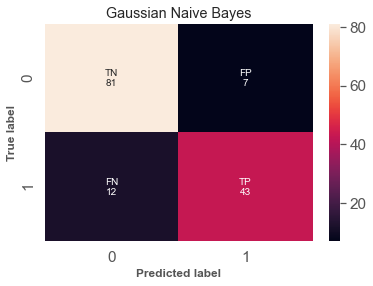

In [36]:
NB_cm = confusion_matrix(y_test, NB_pred)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                NB_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(NB_cm,annot=labels,fmt='')
plt.title('Gaussian Naive Bayes')
plt.ylabel('True label',fontweight='bold')
plt.xlabel('Predicted label',fontweight='bold')
plt.savefig('C:/Users/kayle/Desktop/GaussianNB_confmatrix',dpi=300,bbox_inches='tight', transparent=True)

In [37]:
# get prediction for X_val
new_output = NB.predict(X_val)
np.unique(new_output,return_counts=True)

(array([0, 1], dtype=int64), array([90, 53], dtype=int64))

In [38]:
np.unique(y_val,return_counts=True)

(array([0, 1], dtype=int64), array([83, 60], dtype=int64))

In [39]:
#Hyperparameter Tuning for Gaussian Naive Bayes
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
NB = GaussianNB()
NB_ran = RandomizedSearchCV(NB, param_distributions=params_NB, 
                            verbose=2, cv=3, random_state=42, n_iter=10, scoring='accuracy')
NB_ran.fit(X_train, y_train)
NB_ran.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] var_smoothing=2.848035868435799e-08 .............................
[CV] .............. var_smoothing=2.848035868435799e-08, total=   0.0s
[CV] var_smoothing=2.848035868435799e-08 .............................
[CV] .............. var_smoothing=2.848035868435799e-08, total=   0.0s
[CV] var_smoothing=2.848035868435799e-08 .............................
[CV] .............. var_smoothing=2.848035868435799e-08, total=   0.0s
[CV] var_smoothing=1.5199110829529332e-05 ............................
[CV] ............. var_smoothing=1.5199110829529332e-05, total=   0.0s
[CV] var_smoothing=1.5199110829529332e-05 ............................
[CV] ............. var_smoothing=1.5199110829529332e-05, total=   0.0s
[CV] var_smoothing=1.5199110829529332e-05 ............................
[CV] ............. var_smoothing=1.5199110829529332e-05, total=   0.0s
[CV] var_smoothing=4.3287612810830526e-07 ............................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


{'var_smoothing': 0.12328467394420659}

# K - Nearest Neighbors

In [40]:
X= data.drop(columns=['Class']).values
Y = data['Class'].values
scale= StandardScaler()
X = scale.fit_transform(X) 

# 20% test 80% training data             
X_train, X_test, y_train, y_test, = train_test_split(X, Y, test_size=0.2,random_state = 42)

                                                    # 0.25 x 0.8 = 0.2 for validation data
X_train, X_val, y_train, y_val, = train_test_split(X_train, y_train, test_size=0.25, random_state = 42) 

KNN = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 13, weights='uniform')  
KNN.fit(X_train, y_train)

KNN_pred = pd.DataFrame(KNN.predict(X_test))

print(metrics.classification_report(y_test, KNN_pred))   #K-NearestNeighbors

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        88
           1       0.85      0.80      0.82        55

    accuracy                           0.87       143
   macro avg       0.86      0.85      0.86       143
weighted avg       0.87      0.87      0.87       143



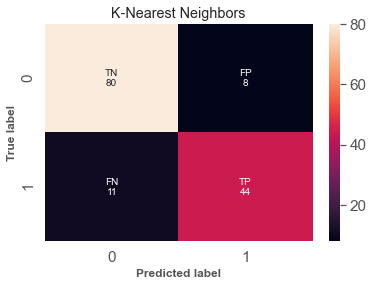

In [41]:
KNN_cm = confusion_matrix(y_test, KNN_pred)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                KNN_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(KNN_cm, annot=labels, fmt='')
plt.title('K-Nearest Neighbors')
plt.ylabel('True label',fontweight='bold')
plt.xlabel('Predicted label',fontweight='bold')
plt.savefig('C:/Users/kayle/Desktop/KNN_confmatrix',dpi=300,bbox_inches='tight', transparent=True)

In [42]:
# get prediction for X_val
new_output = KNN.predict(X_val)
np.unique(new_output,return_counts=True)

(array([0, 1], dtype=int64), array([87, 56], dtype=int64))

In [43]:
np.unique(y_val,return_counts=True)

(array([0, 1], dtype=int64), array([83, 60], dtype=int64))

In [44]:
# define input
new_input =  X # original dataset
# get prediction for new input
new_output = KNN.predict(new_input)
np.unique(new_output,return_counts=True)

(array([0, 1], dtype=int64), array([428, 285], dtype=int64))

In [45]:
data.Class.value_counts()

0    421
1    292
Name: Class, dtype: int64

In [46]:
#Hyperparameter Tuning for KNN
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=KNN, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.826532 using {'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'}
0.787722 (0.048538) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.787722 (0.048538) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.807838 (0.041734) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.801311 (0.043550) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.819034 (0.034370) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.819999 (0.037378) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.821844 (0.035773) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.817195 (0.035792) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.819986 (0.037187) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.822359 (0.035463) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.823266 

# Random Forest

In [47]:
X= data.drop(columns=['Class']).values
Y = data['Class'].values
scale= StandardScaler()
X = scale.fit_transform(X) 

# 20% test 80% training data             
X_train, X_test, y_train, y_test, = train_test_split(X, Y, test_size=0.2,random_state = 16)
                                                    # 0.25 x 0.8 = 0.2 for validation data
X_train, X_val, y_train, y_val, = train_test_split(X_train, y_train, test_size=0.25, random_state = 42) 

#Create a RandomForest Classifier
RF = RandomForestClassifier(max_features = 'sqrt', n_estimators = 100)                      

#Train the model using the training sets y_pred=clf.predict(X_test)
RF.fit(X_train,y_train)

RF_pred = RF.predict(X_test) 

print(metrics.classification_report(y_test, RF_pred))   #Random Forest

              precision    recall  f1-score   support

           0       0.85      0.88      0.87        78
           1       0.85      0.82      0.83        65

    accuracy                           0.85       143
   macro avg       0.85      0.85      0.85       143
weighted avg       0.85      0.85      0.85       143



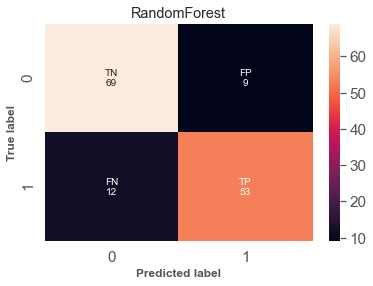

In [48]:
RF_cm = confusion_matrix(y_test, RF_pred)

group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                RF_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(RF_cm,annot=labels,fmt='')
plt.title('RandomForest')
plt.ylabel('True label',fontweight='bold')
plt.xlabel('Predicted label',fontweight='bold')

plt.savefig('C:/Users/kayle/Desktop/RF_confmatrix',dpi=300,bbox_inches='tight', transparent=True)

In [49]:
# get prediction for X_val
new_output = RF.predict(X_val)
np.unique(new_output,return_counts=True)

(array([0, 1], dtype=int64), array([89, 54], dtype=int64))

In [50]:
np.unique(y_val,return_counts=True)

(array([0, 1], dtype=int64), array([86, 57], dtype=int64))

In [51]:
#Hyperparameter Tuning for RF
# define parameters
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.820449 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.817664 (0.037553) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.819510 (0.039645) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.820449 (0.038427) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.810674 (0.042230) with: {'max_features': 'log2', 'n_estimators': 10}
0.819497 (0.038061) with: {'max_features': 'log2', 'n_estimators': 100}
0.819973 (0.039435) with: {'max_features': 'log2', 'n_estimators': 1000}


# Suport Vector Machine

In [52]:
X= data.drop(columns=['Class']).values
Y = data['Class'].values
scale= StandardScaler()
X = scale.fit_transform(X) 

# 20% test 80% training data             
X_train, X_test, y_train, y_test, = train_test_split(X, Y, test_size=0.2,random_state = 42)

                                                                # 0.25 x 0.8 = 0.2 for validation data
X_train, X_val, y_train, y_val, = train_test_split(X_train, y_train, test_size=0.25, random_state = 42) 

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

# Fitting Kernel SVM to the Training set                            
SVM = SVC(C= 10, gamma= 'scale', kernel= 'rbf')
SVM.fit(X_train,y_train)

#Predicting the Test Set
SVM_pred = SVM.predict(X_test)
print(classification_report(y_test, SVM_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        88
           1       0.86      0.80      0.83        55

    accuracy                           0.87       143
   macro avg       0.87      0.86      0.87       143
weighted avg       0.87      0.87      0.87       143



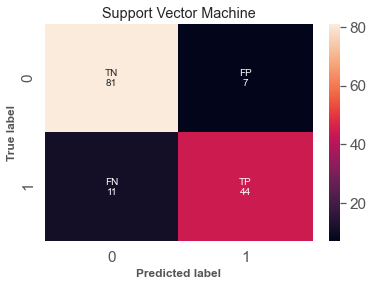

In [53]:
#making confusing matrix
SVM_cm = confusion_matrix(y_test, SVM_pred)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                SVM_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(SVM_cm,annot=labels,fmt='')
plt.title('Support Vector Machine')
plt.ylabel('True label',fontweight='bold')
plt.xlabel('Predicted label',fontweight='bold')
plt.savefig('C:/Users/kayle/Desktop/SVM_confmatrix',dpi=300,bbox_inches='tight', transparent=True)

In [54]:
# get prediction for X_val
new_output = SVM.predict(X_val)
np.unique(new_output,return_counts=True)

(array([0, 1], dtype=int64), array([87, 56], dtype=int64))

In [55]:
np.unique(y_val,return_counts=True)

(array([0, 1], dtype=int64), array([83, 60], dtype=int64))

In [56]:
#Hyperparameter Tuning for SVM
# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.828423 using {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.810674 (0.036218) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.825143 (0.036883) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.670820 (0.043104) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.811613 (0.035663) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.828423 (0.034620) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.673611 (0.043090) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.817671 (0.033357) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.821407 (0.036067) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.663354 (0.043328) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.813961 (0.039082) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.824211 (0.036921) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.744660 (0.045343) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.762983 (0.033112) with: {'C': 0.01, 'gamma': 'scale', 

# Neural Networks

In [57]:
from sklearn.neural_network import MLPClassifier
X= data.drop(columns=['Class']).values
Y = data['Class'].values
scale= StandardScaler()
X = scale.fit_transform(X) 

# 20% test 80% training data             
X_train, X_test, y_train, y_test, = train_test_split(X, Y, test_size=0.2,random_state = 42)

                                                                # 0.25 x 0.8 = 0.2 for validation data
X_train, X_val, y_train, y_val, = train_test_split(X_train, y_train, test_size=0.25, random_state = 42) 

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
#mpl = MLPClassifier(activation= 'tanh', alpha= 0.0001, hidden_layer_sizes= (20,), learning_rate= 'adaptive', solver= 'sgd')
mlp.fit(X_train,y_train)

NN_pred_train = mlp.predict(X_train)
NN_pred_test = mlp.predict(X_test)

In [58]:
print(classification_report(y_test,NN_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91        88
           1       0.93      0.76      0.84        55

    accuracy                           0.89       143
   macro avg       0.90      0.86      0.88       143
weighted avg       0.89      0.89      0.89       143



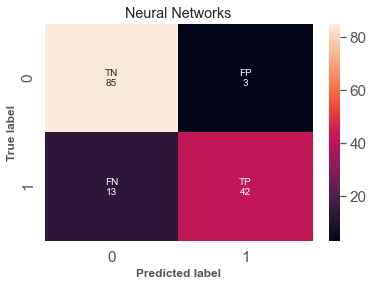

In [59]:
#making confusing matrix
NN_cm = confusion_matrix(y_test, NN_pred_test)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                NN_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(NN_cm,annot=labels,fmt='')
plt.title('Neural Networks')
plt.ylabel('True label',fontweight='bold')
plt.xlabel('Predicted label',fontweight='bold')
plt.savefig('C:/Users/kayle/Desktop/NN_confmatrix',dpi=300,bbox_inches='tight', transparent=True)

In [60]:
# get prediction for X_val
new_output = mlp.predict(X_val)
np.unique(new_output,return_counts=True)

(array([0, 1], dtype=int64), array([94, 49], dtype=int64))

In [61]:
np.unique(y_val,return_counts=True)

(array([0, 1], dtype=int64), array([83, 60], dtype=int64))

In [62]:
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X, Y)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [63]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'sgd'}
